#Brain Tumor Image Classification using CNN
A brain tumor is one of the deadliest illnesses which occurs due to the sudden and unregulated brain tissue growth inside the skull.Convolutional Neural Network (CNN) provides different convolution layers which will automatically extract features from the images.CNN performed well when working with a large dataset which is not always easy to obtain in the medical imaging field.

#Dataset
The dataset contain images of brain cells which is either pituitary or no tumor.

*   Pituitary images is of 827 images with size 512,512,3.
*   512 * 512 represent length and breadth of image whereas 3 represent RGB or true color image where R represent red color, G represent green color and B represent blue color.
*   No tumor image is of 327.





#Import Libraries

In [ ]:
import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout


In [ ]:
data_path='/content/drive/MyDrive/Training'

Done


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''Reading image to find its shape'''
im = cv2.imread("/content/drive/MyDrive/Training/pituitary_tumor/p (10).jpg")
print(im.shape)

(512, 512, 3)


#Data Augmentation
It is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

In [ ]:
train_DataGen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 validation_split=0.2)

In [ ]:
training_data=train_DataGen.flow_from_directory(directory=data_path,
                                                target_size=(128,128),
                                                batch_size=32,
                                                class_mode='binary',
                                                subset='training')

Found 978 images belonging to 2 classes.


In [ ]:
validation_data=train_DataGen.flow_from_directory(directory=data_path,
                                                target_size=(128,128),
                                                batch_size=3,
                                                class_mode='binary',
                                                subset='validation')

Found 244 images belonging to 2 classes.


In [ ]:
training_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

#Visualization


In [ ]:
'''Function to plot the images'''
def plotImages(images_arr):
  fig, axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

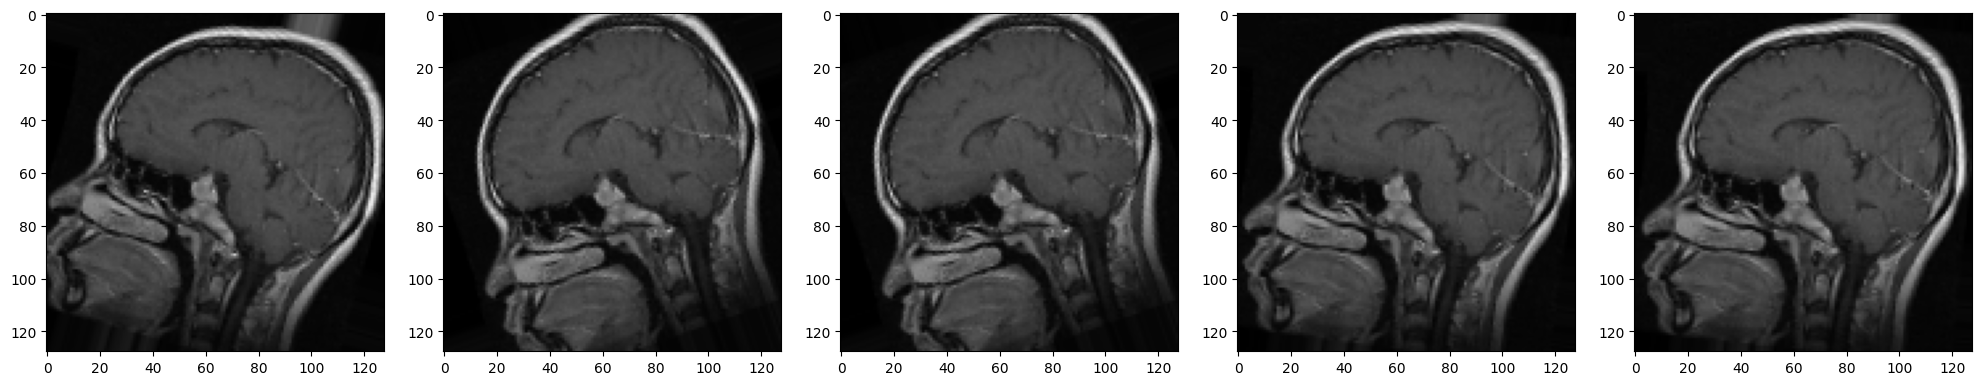

In [ ]:
images=[training_data[0][0][0] for i in range(5)]
plotImages(images)

#Model Building
Sequential Model − Sequential model is basically a linear composition of Keras Layers. Sequential model is easy, minimal as well as has the ability to represent nearly all available neural networks.

In [ ]:
'''Sequential model is created'''
model=Sequential()

In this model a convolution layer is added taking input shape of image 128,128,3. We add 3 convoltion layer and 3 maxpooling layer and use batch normalization to make neural network more faster and stable. Then after flattening use dense layer.

In [ ]:
model.add(Conv2D(input_shape=(128,128,3),
                 activation='relu',
                 filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                 activation='relu',
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(
                 activation='relu',
                 filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(2,activation='softmax'))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#EarlyStopping
EarlyStopping is a callback used while training neural networks, which provides us the advantage of using a large number of training epochs and stopping the training once the model's performance stops improving on the validation Dataset.

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                          mode='min',
                                          patience=5)

In [ ]:
history=model.fit(training_data,
                  validation_data=validation_data,
                  epochs=20,
                  verbose=1,
                  shuffle=True,
                  )

Epoch 1/20
31/31 [==============================] - 23s 648ms/step - loss: 10.4613 - accuracy: 0.8078 - val_loss: 779.6740 - val_accuracy: 0.3238
Epoch 2/20
31/31 [==============================] - 12s 374ms/step - loss: 0.3389 - accuracy: 0.9356 - val_loss: 105.8675 - val_accuracy: 0.3197
Epoch 3/20
31/31 [==============================] - 11s 368ms/step - loss: 0.2225 - accuracy: 0.9356 - val_loss: 32.1052 - val_accuracy: 0.4426
Epoch 4/20
31/31 [==============================] - 12s 390ms/step - loss: 0.1305 - accuracy: 0.9642 - val_loss: 15.2880 - val_accuracy: 0.5410
Epoch 5/20
31/31 [==============================] - 13s 431ms/step - loss: 0.1056 - accuracy: 0.9703 - val_loss: 8.4905 - val_accuracy: 0.5574
Epoch 6/20
31/31 [==============================] - 13s 432ms/step - loss: 0.1054 - accuracy: 0.9663 - val_loss: 4.2570 - val_accuracy: 0.7295
Epoch 7/20
31/31 [==============================] - 11s 365ms/step - loss: 0.0876 - accuracy: 0.9765 - val_loss: 2.8194 - val_accuracy:

In [ ]:
len(history.history['loss'])

20

#Model Evaluation

In [ ]:
results=model.evaluate(validation_data)
results

82/82 [==============================] - 2s 28ms/step - loss: 2.8749 - accuracy: 0.7295


[2.874866485595703, 0.7295082211494446]

In [ ]:
print('Test Accuracy: ',results[1])

Test Accuracy:  0.7295082211494446


#Visualization of Model accuracy in Test and Train

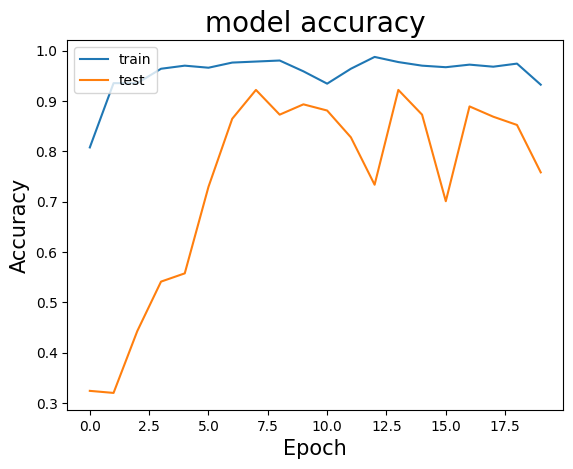

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train','test'],loc='upper left')
plt.show()

#Visualization of Model loss in test and train

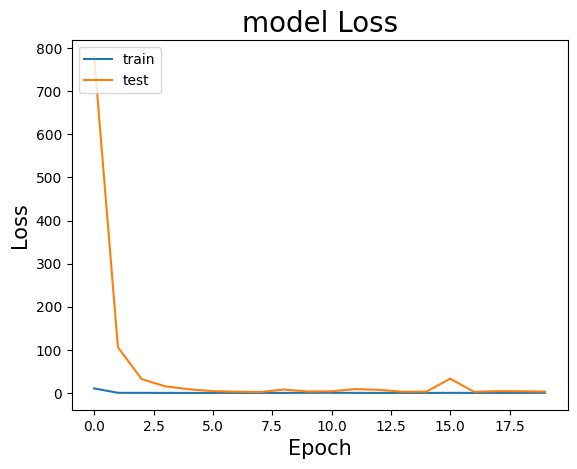

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss',fontsize=20)
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
history.history

{'loss': [10.46125602722168,
  0.33888041973114014,
  0.22249145805835724,
  0.13053922355175018,
  0.10558659583330154,
  0.10536113381385803,
  0.0876128226518631,
  0.10922065377235413,
  0.07246699929237366,
  0.36987555027008057,
  0.31165575981140137,
  0.15601173043251038,
  0.08385547995567322,
  0.15854193270206451,
  0.13056038320064545,
  0.19451837241649628,
  0.1589953899383545,
  0.1252022534608841,
  0.10805771499872208,
  0.3860545754432678],
 'accuracy': [0.8077709674835205,
  0.9355828166007996,
  0.9355828166007996,
  0.9642126560211182,
  0.9703476428985596,
  0.9662576913833618,
  0.976482629776001,
  0.9785276055335999,
  0.9805725812911987,
  0.9591001868247986,
  0.9345602989196777,
  0.9642126560211182,
  0.987730085849762,
  0.977505087852478,
  0.9703476428985596,
  0.9672801494598389,
  0.9723926186561584,
  0.9683026671409607,
  0.9744376540184021,
  0.9325153231620789],
 'val_loss': [779.6740112304688,
  105.86752319335938,
  32.10515213012695,
  15.288006

#Conclusion
 With the help of cnn we attain the accuracy of 72.95%.